# Topic Modeling Results

Contains some topic modeling (unpublished) results.

## Libraries

In [ ]:
# Install required libraries
!pip install --quiet bertopic==0.16.3 safetensors==0.4.5 plotly==5.15.0
# nltk bertopic was downgraded from 0.16.3

# Import necessary libraries
import pickle
from bertopic import BERTopic
import pandas as pd
import plotly.io as pio
#pio.renderers.default = "notebook"
import warnings
warnings.filterwarnings;

In [ ]:
#print(safetensors.__version__)

## Load Topic Model

In [ ]:
# Load the saved topic model
topic_model = BERTopic.load("Topic Model/09OCT24/topic_model")

# Load the reduced embeddings
with open('Topic Model/09OCT24/reduced_embeddings.pickle', 'rb') as handle:
    reduced_embeddings = pickle.load(handle)

# Load the Llama 2 labels
#with open('Topic Model/26AUG24/llama2_labels.pickle', 'rb') as handle:
#    llama2_labels = pickle.load(handle)

# Load the GPT-4o labels
with open('Topic Model/09OCT24/gpt4o_labels.pickle', 'rb') as handle:
    gpt4o_labels = pickle.load(handle)

# Load your original dataframe or at least the titles
df = pd.read_hdf('Files/embeddings_full_tSNE_uMAP_01MAR2024.h5', key='embeddings')
df_filtered = df[['title', 'abstract', 'journal_title', 'pub_year', 'authors', 'tsne_2D_x', 'tsne_2D_y']]
titles = df_filtered['title'].tolist()
abstracts = df_filtered["abstract"].tolist()


NameError: name 'BERTopic' is not defined

In [ ]:
topic_model.get_topic(0, full=True)

## Plot Embeddings

In [ ]:
# Function to create and save visualizations
def create_and_save_visualization(labels, model_name):
    topic_model.set_topic_labels(labels)
    fig = topic_model.visualize_documents(titles,
                                          reduced_embeddings=reduced_embeddings,
                                          hide_annotations=True,
                                          hide_document_hover=False,
                                          custom_labels=True)
    #to save as html
    #fig.write_html(f"{model_name}_topic_visualization.html")
    return fig

# Create and display visualizations
#gpt4o_fig = create_and_save_visualization(gpt4o_labels, "GPT4o")

In [ ]:
create_and_save_visualization(gpt4o_labels, "GPT-4o")

Output hidden; open in https://colab.research.google.com to view.

## Topic Information

In [ ]:
# Print topic information
print("\nTopic Information:")
topic_model.get_topic_info().head( )


Topic Information:


,Topic,Count,Name,CustomName,Representation,GPT-4o,Representative_Docs
0,-1,14980,-1_exposure_metabolic_study_patients,Metabolomics in Disease and Treatment,"[exposure, metabolic, study, patients, metabol...",[Metabolomics in Disease and Treatment],NaN
1,0,19258,0_plant_plants_genes_compounds,Plant Stress Response Mechanisms,"[plant, plants, genes, compounds, stress, grow...",[Plant Stress Response Mechanisms],NaN
2,1,9730,1_liver_diabetes_insulin_muscle,Metabolic Profiles and Dysregulation,"[liver, diabetes, insulin, muscle, mice, exerc...",[Metabolic Profiles and Dysregulation],NaN
3,2,7254,2_cancer_tumor_cells_cell,Cancer Metabolism and Therapy Resistance,"[cancer, tumor, cells, cell, breast, cancer ce...",[Cancer Metabolism and Therapy Resistance],NaN
4,3,6499,3_data_ms_mass_metabolomics,Metabolomics Data Analysis and Integration,"[data, ms, mass, metabolomics, sample, method,...",[Metabolomics Data Analysis and Integration],NaN


**Topic Counts**

In [ ]:
topic_info = topic_model.get_topic_info()

In [ ]:
# Create the DataFrame
df_topic_count = pd.DataFrame({
    'Topic': topic_info['Topic'],
    'Count': topic_info['Count'],
    'CustomName': topic_info['CustomName'],
    #'Representation': topic_info['Representation']
})

In [ ]:
df_topic_count

,Topic,Count,CustomName
0,-1,14980,Metabolomics in Disease and Treatment
1,0,19258,Plant Stress Response Mechanisms
2,1,9730,Metabolic Profiles and Dysregulation
3,2,7254,Cancer Metabolism and Therapy Resistance
4,3,6499,Metabolomics Data Analysis and Integration
5,4,4313,Gut Microbiota and Metabolomic Interactions
6,5,2723,Metabolomics in Neurodegenerative Disorders
7,6,2389,Environmental Toxicology and Metabolism
8,7,1971,Metabolomics in Animal Nutrition
9,8,1661,Microbiota-Gut-Brain Axis Interactions


In [ ]:
# Function to print top terms for each topic
def print_top_terms(n_topics=5, n_terms=10):
    for i in range(n_topics):
        print(f"\nTop {n_terms} terms for Topic {i}:")
        print(topic_model.get_topic(i)[:n_terms])

print("\nTop terms for first 5 topics:")
print_top_terms()


Top terms for first 5 topics:

Top 10 terms for Topic 0:
[['plant', 0.2533211491642013], ['plants', 0.2363627168083542], ['genes', 0.20697889730538843], ['compounds', 0.20249872128644972], ['stress', 0.20225985279266478], ['growth', 0.198586808100237], ['species', 0.19253435727724302], ['leaves', 0.19225724665660043], ['biosynthesis', 0.19222836587020983], ['production', 0.1904459583666831]]

Top 10 terms for Topic 1:
[['liver', 0.2553843384810296], ['diabetes', 0.21572320388327354], ['insulin', 0.21457663409749655], ['muscle', 0.20376163934182198], ['mice', 0.20356278209584325], ['exercise', 0.19977170939408326], ['obesity', 0.1965584348534151], ['heart', 0.19566552711479004], ['diet', 0.1954803708871883], ['hepatic', 0.193189643172244]]

Top 10 terms for Topic 2:
[['cancer', 0.37852654333747204], ['tumor', 0.312547535360719], ['cells', 0.305661962531353], ['cell', 0.2660296334483482], ['breast', 0.247039976881673], ['cancer cells', 0.24132808303516712], ['breast cancer', 0.238475435

## Visualizer

### Intertopic Distance Map

In [ ]:
topic_model.visualize_topics()

### Topic Word Scores

#### Default Plots

In [ ]:
topic_model.visualize_barchart()

#### With Matplotlib

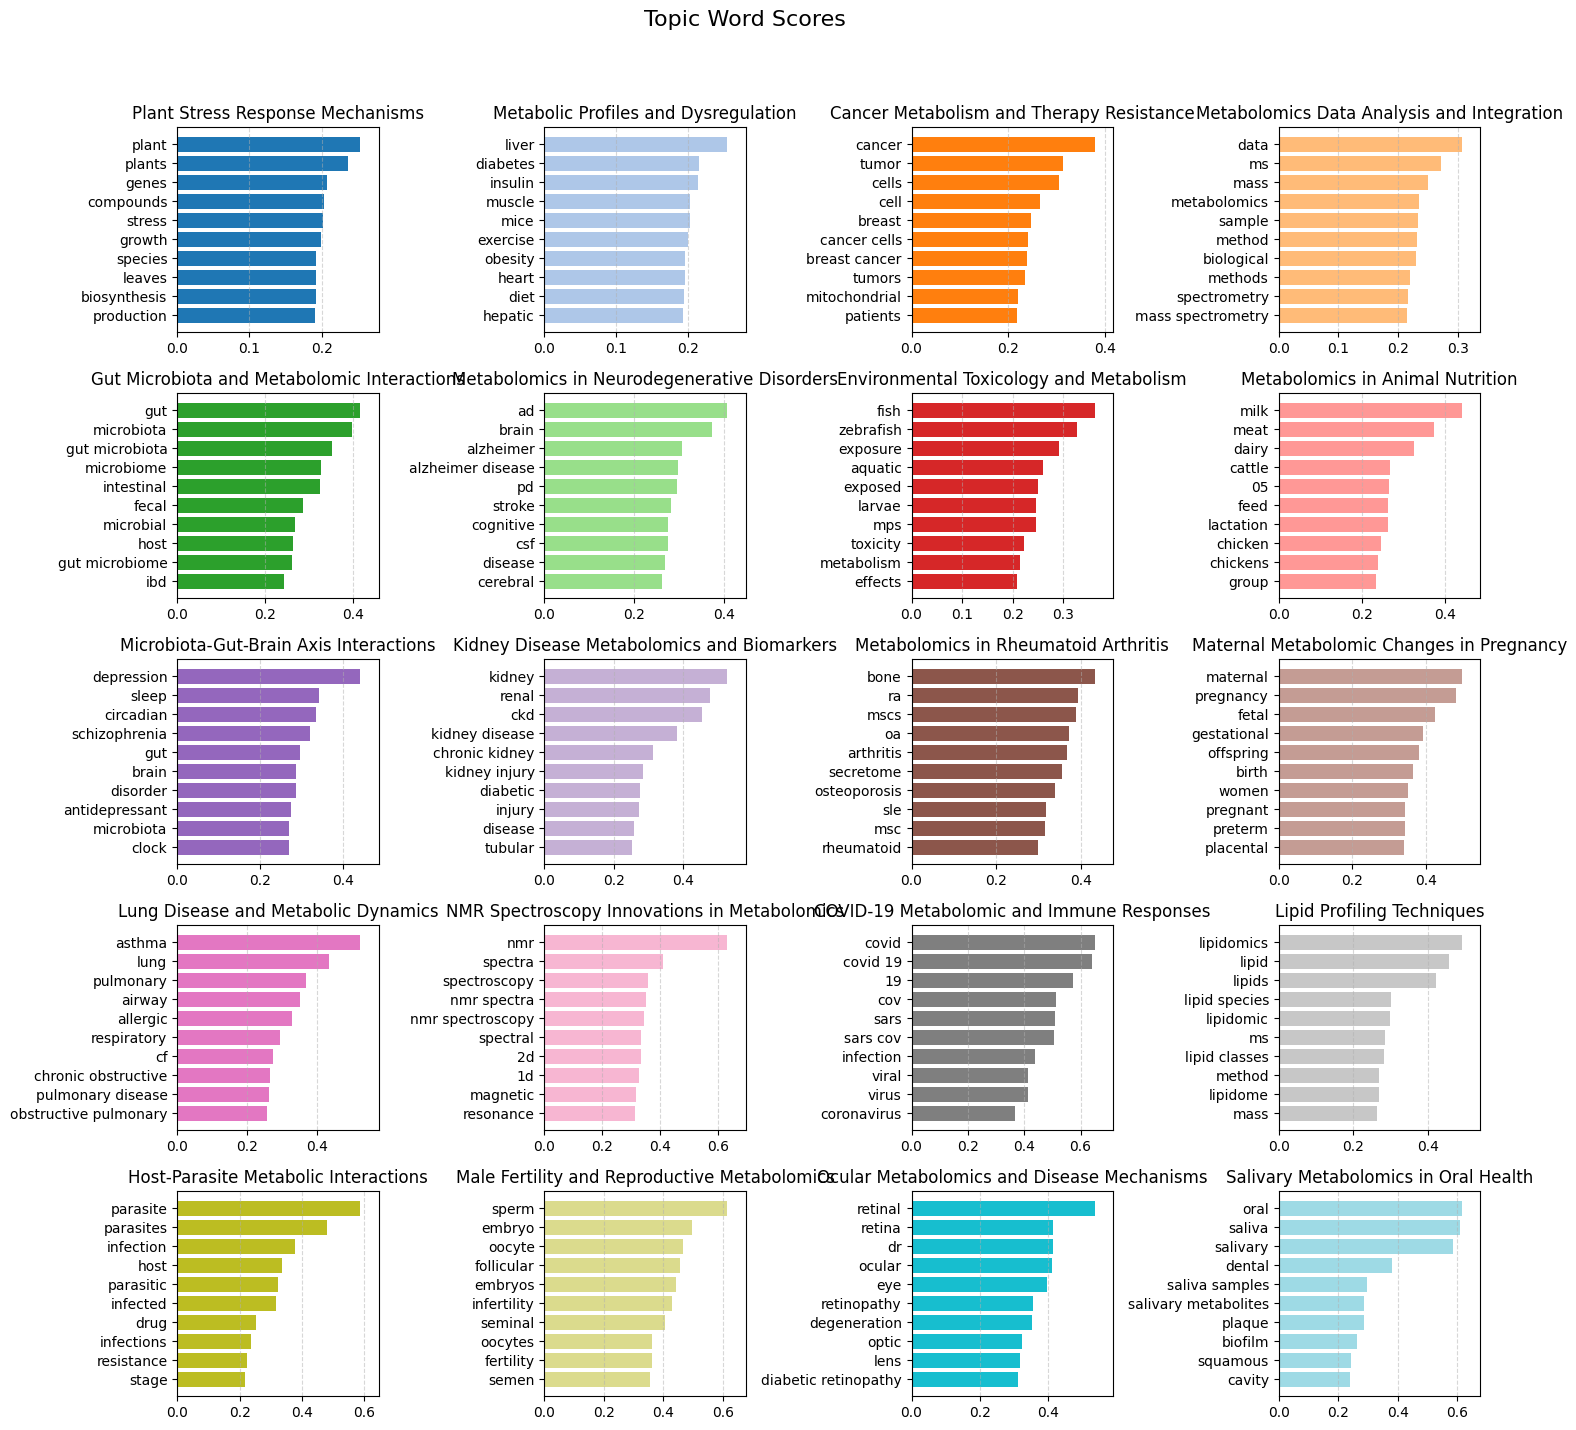

In [ ]:
import matplotlib.pyplot as plt

def visualize_topic_word_scores(topic_model):
    """
    Visualizes the topic word scores in a grid of subplots,
    excluding Topic -1 and using custom names.

    Args:
      topic_model: A BERTopic model object.
    """

    topic_info = topic_model.get_topic_info()

    # Exclude Topic -1
    topic_info = topic_info[topic_info['Topic'] != -1]

    num_topics = len(topic_info)
    cols = 4  # Number of columns in the grid
    rows = (num_topics + cols - 1) // cols  # Calculate number of rows

    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
    fig.suptitle("Topic Word Scores", fontsize=16,
                 #fontfamily='Optima Sans Serif'
    )

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    for i in range(num_topics):
        topic_num = topic_info['Topic'].iloc[i]
        custom_name = topic_info['CustomName'].iloc[i]
        topic_words = topic_model.get_topic(topic_num)
        words = [word for word, score in topic_words]
        scores = [score for word, score in topic_words]

        ax = axes[i]  # Get the current subplot axis
        ax.barh(words, scores, color=plt.cm.tab20(i))

        # Set title with Optima Sans Serif font
        ax.set_title(f"{custom_name}",
                     #fontfamily='Optima Sans Serif'
                     )

        ax.invert_yaxis()
        ax.set_xlim(0, max(scores) * 1.1)

        # Add grid lines for better readability
        ax.xaxis.grid(True, linestyle='--', alpha=0.5)

    # Remove any extra subplots if the number of topics is not a multiple of cols
    if num_topics % cols != 0:
        for i in range(num_topics, len(axes)):
            axes[i].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


    plt.show()

# Call the function with your BERTopic model
visualize_topic_word_scores(topic_model)

#### With Plotly

In [ ]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def visualize_topic_word_scores(topic_model):
    """
    Visualizes the topic word scores using plotly,
    excluding Topic -1 and using custom names, with
    aesthetic styling similar to the provided example.

    Args:
      topic_model: A BERTopic model object.
    """

    topic_info = topic_model.get_topic_info()

    # Exclude Topic -1
    topic_info = topic_info[topic_info['Topic'] != -1]

    num_topics = len(topic_info)
    cols = 4  # Number of columns in the grid
    rows = (num_topics + cols - 1) // cols  # Calculate number of rows

    fig = make_subplots(rows=rows, cols=cols, subplot_titles=topic_info['CustomName'].tolist())

    for i in range(num_topics):
        topic_num = topic_info['Topic'].iloc[i]
        topic_words = topic_model.get_topic(topic_num)
        words = [word for word, score in topic_words]
        scores = [score for word, score in topic_words]

        row = i // cols + 1
        col = i % cols + 1

        fig.add_trace(go.Bar(
            x=scores,
            y=words,
            orientation='h',
            marker_color=px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)]  # Cycle through colors
        ), row=row, col=col)

        fig.update_xaxes(
            title_text="",  # Hide x-axis title
            showticklabels=True,  # Hide x-axis tick labels
            showgrid=True,  # Hide x-axis grid lines
            row=row, col=col
        )
        fig.update_yaxes(
            title_text="",  # Hide y-axis title
            autorange="reversed",
            showticklabels=True,  # Hide y-axis tick labels
            showgrid=True,  # Hide y-axis grid lines
            row=row, col=col
        )

    fig.update_layout(
        title_text="Topic Word Scores",
        height=rows * 300,  # Adjust height based on the number of rows
        showlegend=False,
        font_family='Optima, sans-serif',
        font_size=9,
        title_font=dict(size=24),
        plot_bgcolor='white'
    )

    # Update font size for subplot titles
    for i in range(num_topics):
        row = i // cols + 1
        col = i % cols + 1
        fig.layout.annotations[i].update(font_size=9)  # Adjust font_size as needed

    # Save the plot as SVG and PNG
    #pio.write_image(fig, 'topic_word_scores.svg', format='svg')
    #pio.write_image(fig, 'topic_word_scores.png', format='png')

    fig.show()

# Call the function with your BERTopic model
visualize_topic_word_scores(topic_model)

### Topic Model Heatmap

In [ ]:
topic_model.visualize_heatmap()